In [7]:
import os
import numpy as np
import zipfile
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
physical_devices = tf.config.list_physical_devices("GPU")
print(physical_devices)
tf.config.experimental.set_memory_growth(physical_devices[0], True)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-04-09 23:20:59.398362: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-09 23:20:59.418863: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-09 23:20:59.419058: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

# Data preprocessing

In [3]:
path = "dataset_primary/dataset_primary/data_05S01/"
no_attack_dir = os.listdir(path + "0/")
attack_dir = os.listdir(path + "1/")

In [4]:
# Load the images and labels into memory
images = np.zeros((len(no_attack_dir) + len(attack_dir), 112, 112, 3), dtype=np.float32)
labels = np.zeros(len(no_attack_dir) + len(attack_dir), dtype=np.int32)

# load the images and labels into memory
for i, filename in enumerate(no_attack_dir):
    img = Image.open(path + "0/" + filename).convert("RGB")
    img = img.resize((112, 112), Image.BILINEAR)
    img = np.asarray(img, dtype=np.float32)
    images[i] = img
for i, filename in enumerate(attack_dir):
    img = Image.open(path + "1/" + filename).convert("RGB")
    img = img.resize((112, 112), Image.BILINEAR)
    img = np.asarray(img, dtype=np.float32)
    images[i + len(no_attack_dir)] = img
    labels[i + len(no_attack_dir)] = 1

In [5]:
labels = tf.keras.utils.to_categorical(labels, 2)
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [6]:
# Shuffle the data and split into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)
del images, labels

# Models

In [8]:
model_with_batch_norm = Sequential()
model_with_batch_norm.add(Conv2D(16, (3, 3), activation="relu", input_shape=(112, 112, 3)))
model_with_batch_norm.add(BatchNormalization())
model_with_batch_norm.add(MaxPooling2D((2, 2)))
model_with_batch_norm.add(Conv2D(16, (3, 3), activation="relu"))
model_with_batch_norm.add(BatchNormalization())
model_with_batch_norm.add(MaxPooling2D((2, 2)))
model_with_batch_norm.add(Conv2D(16, (3, 3), activation='relu'))
model_with_batch_norm.add(BatchNormalization())
model_with_batch_norm.add(MaxPooling2D((2, 2)))
model_with_batch_norm.add(Flatten())
model_with_batch_norm.add(Dense(64, activation='relu'))
model_with_batch_norm.add(BatchNormalization())
model_with_batch_norm.add(Dense(2, activation='softmax'))
model_with_batch_norm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 110, 110, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 110, 110, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 53, 53, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 53, 53, 16)       64        
 hNormalization)                                                 
                                                        

2023-04-09 23:23:38.231332: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-09 23:23:38.231773: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-09 23:23:38.231925: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [11]:
model_with_batch_norm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history_batch_norm = model_with_batch_norm.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=80,
    validation_data=(X_test, y_test),
)

Epoch 1/20


2023-04-09 23:25:11.653838: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-04-09 23:25:12.846302: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-04-09 23:25:13.154041: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x20c36020 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-09 23:25:13.154091: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA RTX A6000, Compute Capability 8.6
2023-04-09 23:25:13.164737: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-04-09 23:25:13.310180: I ./tensorflow/compiler/jit/device_compiler.h:180] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


225/225 [==============================] - 11s 17ms/step - loss: 0.3857 - accuracy: 0.8217 - val_loss: 0.3479 - val_accuracy: 0.8339
Epoch 2/20
225/225 [==============================] - 3s 11ms/step - loss: 0.2956 - accuracy: 0.8532 - val_loss: 0.3244 - val_accuracy: 0.8406
Epoch 3/20
225/225 [==============================] - 2s 11ms/step - loss: 0.2733 - accuracy: 0.8645 - val_loss: 0.3761 - val_accuracy: 0.8326
Epoch 4/20
225/225 [==============================] - 2s 11ms/step - loss: 0.2591 - accuracy: 0.8723 - val_loss: 0.3238 - val_accuracy: 0.8392
Epoch 5/20
225/225 [==============================] - 3s 11ms/step - loss: 0.2508 - accuracy: 0.8738 - val_loss: 0.3155 - val_accuracy: 0.8390
Epoch 6/20
225/225 [==============================] - 3s 11ms/step - loss: 0.2350 - accuracy: 0.8806 - val_loss: 0.3146 - val_accuracy: 0.8383
Epoch 7/20
225/225 [==============================] - 3s 11ms/step - loss: 0.2249 - accuracy: 0.8843 - val_loss: 0.3430 - val_accuracy: 0.8399
Epoch 8/2

In [12]:
model_without_batch_norm = Sequential()
model_without_batch_norm.add(Conv2D(16, (3, 3), activation="relu", input_shape=(112, 112, 3)))
model_without_batch_norm.add(MaxPooling2D((2, 2)))
model_without_batch_norm.add(Conv2D(16, (3, 3), activation="relu"))
model_without_batch_norm.add(MaxPooling2D((2, 2)))
model_without_batch_norm.add(Conv2D(16, (3, 3), activation='relu'))
model_without_batch_norm.add(MaxPooling2D((2, 2)))
model_without_batch_norm.add(Flatten())
model_without_batch_norm.add(Dense(64, activation='relu'))
model_without_batch_norm.add(Dense(2, activation='softmax'))
model_without_batch_norm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 110, 110, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 55, 55, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 53, 53, 16)        2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 16)      

In [13]:
model_without_batch_norm.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

history_no_batch_norm = model_without_batch_norm.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=80,
    validation_data=(X_test, y_test),
)

Epoch 1/20
225/225 [==============================] - 4s 12ms/step - loss: 1.8581 - accuracy: 0.7741 - val_loss: 0.3812 - val_accuracy: 0.8212
Epoch 2/20
225/225 [==============================] - 2s 9ms/step - loss: 0.3414 - accuracy: 0.8367 - val_loss: 0.3592 - val_accuracy: 0.8265
Epoch 3/20
225/225 [==============================] - 2s 9ms/step - loss: 0.3049 - accuracy: 0.8492 - val_loss: 0.3553 - val_accuracy: 0.8279
Epoch 4/20
225/225 [==============================] - 2s 9ms/step - loss: 0.2867 - accuracy: 0.8551 - val_loss: 0.3402 - val_accuracy: 0.8263
Epoch 5/20
225/225 [==============================] - 2s 9ms/step - loss: 0.2695 - accuracy: 0.8630 - val_loss: 0.3430 - val_accuracy: 0.8350
Epoch 6/20
225/225 [==============================] - 2s 9ms/step - loss: 0.2619 - accuracy: 0.8671 - val_loss: 0.3451 - val_accuracy: 0.8292
Epoch 7/20
225/225 [==============================] - 2s 9ms/step - loss: 0.2512 - accuracy: 0.8721 - val_loss: 0.3568 - val_accuracy: 0.8265
Epoch

# Results

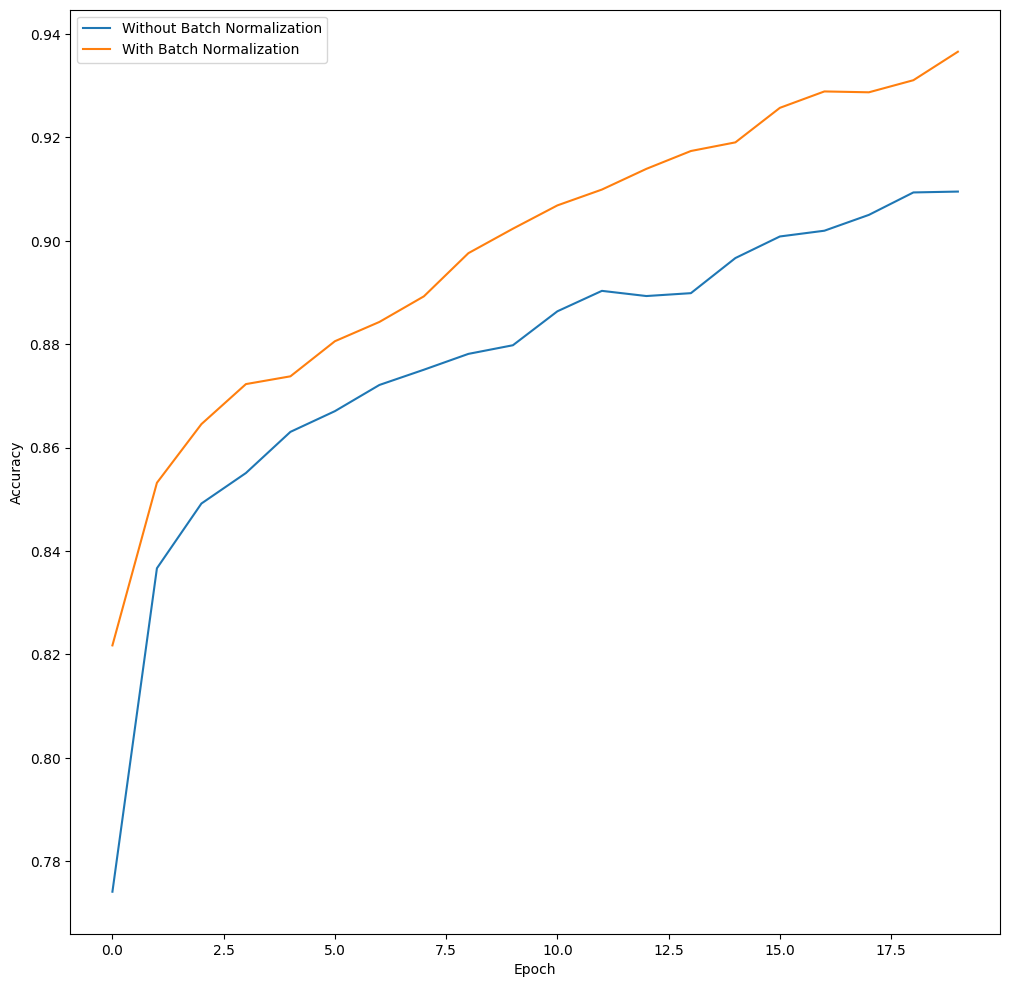

In [17]:
plt.figure(figsize=((12, 12)))

for history, name in zip([history_no_batch_norm, history_batch_norm], ['Without Batch Normalization', 'With Batch Normalization']):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(len(acc))
    plt.plot(epochs, acc, label=name)

plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

    

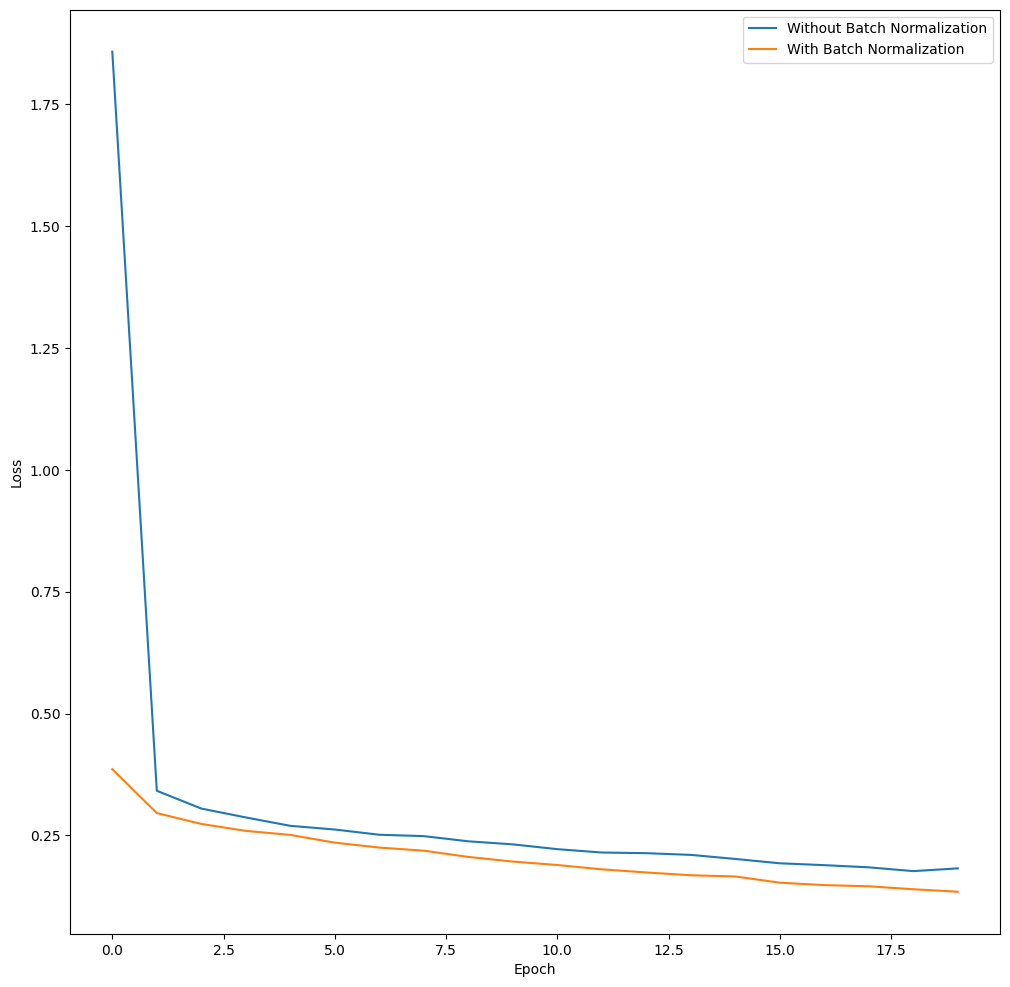

In [19]:
plt.figure(figsize=((12, 12)))

for history, name in zip([history_no_batch_norm, history_batch_norm], ['Without Batch Normalization', 'With Batch Normalization']):
    acc = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(len(acc))
    plt.plot(epochs, loss, label=name)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()